In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/loan%20aproaval%20DL/loan_approval_dataset.csv",skipinitialspace=True,)
df.head() 

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [5]:
df.columns 

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [6]:
df["loan_status"].unique()

array(['Approved', 'Rejected'], dtype=object)

In [7]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
## one hotencoding  
df2 = pd.get_dummies(df,drop_first="if_binary").astype(int) 
df2.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,loan_status_Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


In [9]:
## x and y data spliting  
x = df2.drop(['loan_status_Rejected','loan_id'],axis='columns')
y = df2[['loan_status_Rejected']]

In [10]:
x.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1


In [11]:
# y.head()

In [12]:
## train test split  
# standard scaler ANN  
from sklearn.preprocessing import StandardScaler 

In [13]:
std_scaler = StandardScaler() 
x_transformed = std_scaler.fit_transform(x)

In [14]:
x_transformed.shape , x.shape 

((4269, 11), (4269, 11))

In [15]:
## train test split  
from sklearn.model_selection import train_test_split 

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.20)

In [17]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense

In [18]:
x_train.shape 

(3415, 11)

In [19]:
# artificial neural network defining 
ANN_model = Sequential()
ANN_model.add(Dense(units=64,activation='relu',input_dim=11))  # hidden layer 1st + with input layer  
ANN_model.add(Dense(units=32,activation='relu'))  # hidden layer 2 
ANN_model.add(Dense(units=16,activation='relu'))  # hidden layer 3 

ANN_model.add(Dense(units=1,activation='sigmoid'))   # output layer  # binary class.
ANN_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 
ANN_model.summary()


C:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
x.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_Not Graduate',
       'self_employed_Yes'],
      dtype='object')

In [21]:
# categorical 
# missing value 

In [22]:
pd.DataFrame(x_train,columns=x.columns).head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,0.885344,0.834088,0.029478,-0.858444,0.446980,2.233994,1.943019,1.513146,0.745678,1.004461,-1.007288
1,1.475067,1.261665,1.522460,-0.508091,-0.486839,0.373279,-0.723069,1.655961,0.561051,1.004461,0.992765
2,1.475067,0.691562,0.869972,1.243677,1.177795,1.726526,0.302349,1.392302,-0.269768,-0.995559,-1.007288
3,-0.883825,-0.163592,-0.468183,0.192617,-0.794246,-0.964591,-0.859792,-0.464292,0.499509,1.004461,0.992765
4,-0.883825,-0.626801,-0.501360,0.542970,0.823988,-1.102992,-0.996514,-0.738936,-0.146683,-0.995559,0.992765


In [23]:
x_train.shape ,y_train.shape 

((3415, 11), (3415, 1))

In [24]:
history = ANN_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.7614 - loss: 0.5365 - val_accuracy: 0.9215 - val_loss: 0.2181
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9242 - loss: 0.2065 - val_accuracy: 0.9227 - val_loss: 0.1723
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9339 - loss: 0.1781 - val_accuracy: 0.9204 - val_loss: 0.1534
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9389 - loss: 0.1447 - val_accuracy: 0.9356 - val_loss: 0.1423
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9544 - loss: 0.1330 - val_accuracy: 0.9379 - val_loss: 0.1299
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9592 - loss: 0.1200 - val_accuracy: 0.9426 - val_loss: 0.1252
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9573 - loss: 0.1152 - val_accuracy: 0.9356 - val_loss: 0.1270
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9590 - loss: 0.1062 - val_accurac

In [25]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.842167,0.409537,0.921546,0.218142
1,0.928551,0.195715,0.922717,0.172325
2,0.937921,0.164716,0.920375,0.153404
3,0.944656,0.148490,0.935597,0.142311
4,0.952269,0.134158,0.937939,0.129907
5,0.955783,0.125489,0.942623,0.125215
6,0.956369,0.115533,0.935597,0.127027
7,0.959297,0.107172,0.949649,0.116473
8,0.964861,0.101093,0.949649,0.113551
9,0.964861,0.103737,0.953162,0.111972


In [26]:
## prediction  
prediction = ANN_model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [33]:
pred = (prediction>0.5).astype(int).ravel()  # 1D , ravel, reshape , flatten

In [36]:
y_test['prediction'] = pred 

In [38]:
y_test.head() 

,loan_status_Rejected,prediction
2893,0,0
468,1,0
1576,0,0
222,1,1
3097,0,0


In [39]:
from sklearn.metrics import confusion_matrix, classification_report 

In [40]:
matrix = confusion_matrix(y_test['loan_status_Rejected'],y_test['prediction'])
matrix 

array([[544,  10],
       [ 30, 270]], dtype=int64)

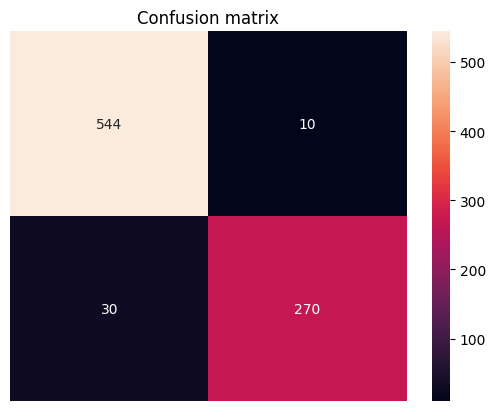

In [43]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.heatmap(matrix,annot=True,fmt="d")
plt.title('Confusion matrix')
plt.axis('off')
plt.show()

In [44]:
print(classification_report(y_test['loan_status_Rejected'],y_test['prediction']))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       554
           1       0.96      0.90      0.93       300

    accuracy                           0.95       854
   macro avg       0.96      0.94      0.95       854
weighted avg       0.95      0.95      0.95       854



In [48]:
### model save 
import os,joblib 
os.makedirs('models',exist_ok=True)
ANN_model.save('./models/loan_approval.h5')   # pytorch  .pt  
joblib.dump(std_scaler,'./models/std_scaler.lb')

['./models/std_scaler.lb']

In [50]:
## to load the model 
from tensorflow.keras.models import load_model

In [51]:
ann_model_loaded = load_model('./models/loan_approval.h5')

In [52]:
ann_model_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,395 (13.27 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)